# Mixture Density Network

Reproducing the classic Bishop MDN network tasks in Keras. The idea in this task is to predict a the value of an inverse sine function. This function has multiple real-valued solutions at each point, so the ANN model needs to have the capacity to handle this in it's loss function. An MDN is a good way to handle the predictions of these multiple output values.

There's a couple of other versions of this task, and this implementation owes much to the following:

- [David Ha - Mixture Density Networks with TensorFlow](http://blog.otoro.net/2015/11/24/mixture-density-networks-with-tensorflow/)
- [Mixture Density Networks in Edward](http://edwardlib.org/tutorials/mixture-density-network)

In [1]:
# Normal imports for everybody
import keras
from context import * # imports the MDN layer 
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib notebook

Using TensorFlow backend.


## Generate Synthetic Data

Data generation

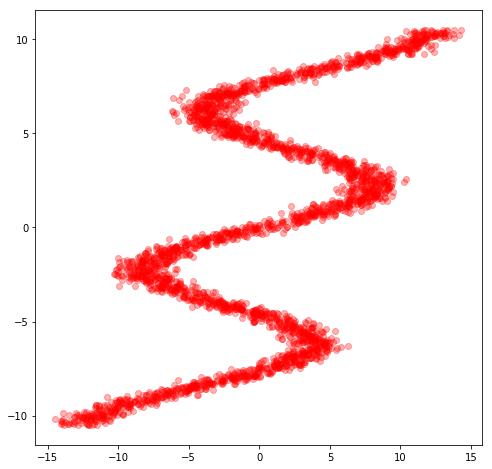

In [2]:
## Generating some data:
NSAMPLE = 3000

y_data = np.float32(np.random.uniform(-10.5, 10.5, NSAMPLE))
r_data = np.random.normal(size=NSAMPLE)
x_data = np.sin(0.75 * y_data) * 7.0 + y_data * 0.5 + r_data * 1.0
x_data = x_data.reshape((NSAMPLE, 1))

plt.figure(figsize=(8, 8))
plt.plot(x_data,y_data,'ro', alpha=0.3)
plt.show()

## Build the MDN Model

Now we will construct the MDN model in Keras. This uses the `Sequential` model interface in Keras.

The `MDN` layer comes after one or more `Dense` layers. You need to define the output dimension and number of mixtures for the MDN like so: `MDN(output_dimension, number_mixtures)`.

For this problem, we only need an output dimension of 1 as we are predicting one value (y). Adding more mixtures adds a more parameters (model is more complex, takes longer to train), but might help make the solutions better. You can see from the training data that there are at maximum 5 different layers to predict in the curve, so setting `N_MIXES = 5` is a good place to start.

For MDNs, we have to use a special loss function that can handle the mixture parameters: the function has to take into account the number of output dimensions and mixtures.

In [3]:
N_HIDDEN = 15
N_MIXES = 10

model = keras.Sequential()
model.add(keras.layers.Dense(N_HIDDEN, batch_input_shape=(None, 1), activation='relu'))
model.add(keras.layers.Dense(N_HIDDEN, activation='relu'))
model.add(mdn.MDN(1, N_MIXES))
model.compile(loss=mdn.get_mixture_loss_func(1,N_MIXES), optimizer=keras.optimizers.Adam()) #, metrics=[mdn.get_mixture_mse_accuracy(1,N_MIXES)])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                30        
_________________________________________________________________
dense_2 (Dense)              (None, 15)                240       
_________________________________________________________________
mdn_1 (MDN)                  (None, 1)                 480       
Total params: 750
Trainable params: 750
Non-trainable params: 0
_________________________________________________________________


### Training the model

Now we train the model using Keras' normal `fit` command.

In [4]:
history = model.fit(x=x_data, y=y_data, batch_size=128, epochs=500, validation_split=0.15)

Train on 2550 samples, validate on 450 samples
Epoch 1/500
2550/2550 [==============================] - 2s 595us/step - loss: 8.0815 - val_loss: 7.0011
Epoch 2/500
2550/2550 [==============================] - 0s 35us/step - loss: 6.3602 - val_loss: 5.7985
Epoch 3/500
2550/2550 [==============================] - 0s 30us/step - loss: 5.4384 - val_loss: 5.0596
Epoch 4/500
2550/2550 [==============================] - 0s 31us/step - loss: 4.8325 - val_loss: 4.5415
Epoch 5/500
2550/2550 [==============================] - 0s 33us/step - loss: 4.3957 - val_loss: 4.2104
Epoch 6/500
2550/2550 [==============================] - 0s 32us/step - loss: 4.1130 - val_loss: 3.9777
Epoch 7/500
2550/2550 [==============================] - 0s 36us/step - loss: 3.9184 - val_loss: 3.8280
Epoch 8/500
2550/2550 [==============================] - 0s 35us/step - loss: 3.7666 - val_loss: 3.7015
Epoch 9/500
2550/2550 [==============================] - 0s 36us/step - loss: 3.6438 - val_loss: 3.5803
Epoch 10/500
255

2550/2550 [==============================] - 0s 31us/step - loss: 1.4732 - val_loss: 1.4879
Epoch 156/500
2550/2550 [==============================] - 0s 31us/step - loss: 1.4691 - val_loss: 1.4668
Epoch 157/500
2550/2550 [==============================] - 0s 38us/step - loss: 1.4643 - val_loss: 1.4643
Epoch 158/500
2550/2550 [==============================] - 0s 31us/step - loss: 1.4642 - val_loss: 1.4788
Epoch 159/500
2550/2550 [==============================] - 0s 30us/step - loss: 1.4579 - val_loss: 1.4515
Epoch 160/500
2550/2550 [==============================] - 0s 31us/step - loss: 1.4581 - val_loss: 1.4850
Epoch 161/500
2550/2550 [==============================] - 0s 31us/step - loss: 1.4481 - val_loss: 1.4513
Epoch 162/500
2550/2550 [==============================] - 0s 31us/step - loss: 1.4455 - val_loss: 1.4609
Epoch 163/500
2550/2550 [==============================] - 0s 31us/step - loss: 1.4329 - val_loss: 1.4476
Epoch 164/500
2550/2550 [==============================] - 0

2550/2550 [==============================] - 0s 32us/step - loss: 1.3489 - val_loss: 1.3658
Epoch 310/500
2550/2550 [==============================] - 0s 34us/step - loss: 1.3427 - val_loss: 1.3917
Epoch 311/500
2550/2550 [==============================] - 0s 32us/step - loss: 1.3409 - val_loss: 1.3792
Epoch 312/500
2550/2550 [==============================] - 0s 32us/step - loss: 1.3406 - val_loss: 1.3714
Epoch 313/500
2550/2550 [==============================] - 0s 32us/step - loss: 1.3554 - val_loss: 1.3796
Epoch 314/500
2550/2550 [==============================] - 0s 30us/step - loss: 1.3593 - val_loss: 1.3796
Epoch 315/500
2550/2550 [==============================] - 0s 31us/step - loss: 1.3397 - val_loss: 1.3853
Epoch 316/500
2550/2550 [==============================] - 0s 30us/step - loss: 1.3433 - val_loss: 1.3790
Epoch 317/500
2550/2550 [==============================] - 0s 30us/step - loss: 1.3446 - val_loss: 1.3886
Epoch 318/500
2550/2550 [==============================] - 0

2550/2550 [==============================] - 0s 30us/step - loss: 1.3274 - val_loss: 1.3897
Epoch 464/500
2550/2550 [==============================] - 0s 30us/step - loss: 1.3322 - val_loss: 1.3710
Epoch 465/500
2550/2550 [==============================] - 0s 31us/step - loss: 1.3332 - val_loss: 1.3634
Epoch 466/500
2550/2550 [==============================] - 0s 30us/step - loss: 1.3349 - val_loss: 1.4123
Epoch 467/500
2550/2550 [==============================] - 0s 30us/step - loss: 1.3519 - val_loss: 1.3777
Epoch 468/500
2550/2550 [==============================] - 0s 30us/step - loss: 1.3319 - val_loss: 1.3690
Epoch 469/500
2550/2550 [==============================] - 0s 31us/step - loss: 1.3339 - val_loss: 1.3865
Epoch 470/500
2550/2550 [==============================] - 0s 31us/step - loss: 1.3261 - val_loss: 1.3774
Epoch 471/500
2550/2550 [==============================] - 0s 31us/step - loss: 1.3351 - val_loss: 1.3605
Epoch 472/500
2550/2550 [==============================] - 0

In [5]:
# Save model if you want to.
# model.save("MDN-1D-sine-prediction-model.h5")

In [6]:
# Load the model if you want to.
# To load models from file, you need to supply the layer and loss function as custom_objects:
# model = keras.models.load_model('MDN-1D-sine-prediction-model.h5', custom_objects={'MDN': mdn.MDN, 'loss_func': mdn.get_mixture_loss_func(1, N_MIXES)})

### Training and Validation Loss

It's interesting to see how the model trained. We can see that after a certain point training is rather slow.

For this problem a loss value around 1.5 produces quite good results.

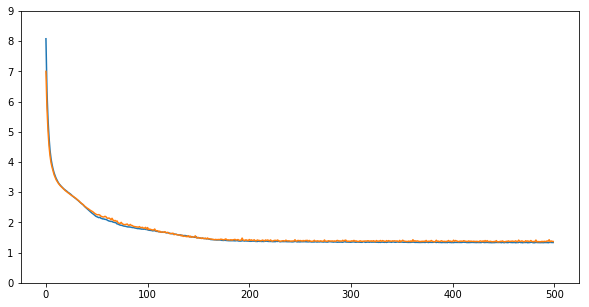

In [7]:
plt.figure(figsize=(10, 5))
plt.ylim([0,9])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

## Sampling Functions

The MDN model outputs parameters of a mixture model---a list of means (mu), variances (sigma), and weights (pi).

Below we have some functiosn to split up these parameters and sample from the normal distributions that they form.

## Try out the MDN Model

Now we try out the model by making predictions at 3000 evenly spaced points on the x-axis. 

Mixture models output lists of parameters, so we're going to sample from these parameters for each point on the x-axis, and also try plotting the parameters themselves so we can have some insight into what the model is learning!

In [8]:
## Sample on some test data:
x_test = np.float32(np.arange(-15,15,0.01))
NTEST = x_test.size
print("Testing:", NTEST, "samples.")
x_test = x_test.reshape(NTEST,1) # needs to be a matrix, not a vector

# Make predictions from the model
y_test = model.predict(x_test)
# y_test contains parameters for distributions, not actual points on the graph.
# To find points on the graph, we need to sample from each distribution.

# Sample from the predicted distributions
y_samples = np.apply_along_axis(mdn.sample_from_output, 1, y_test, N_MIXES,1,temp=1.0)

# Split up the mixture parameters (for future fun)
mus = np.apply_along_axis((lambda a: a[:N_MIXES]),1, y_test)
sigs = np.apply_along_axis((lambda a: a[N_MIXES:2*N_MIXES]),1, y_test)
pis = np.apply_along_axis((lambda a: mdn.softmax(a[2*N_MIXES:])),1, y_test)

Testing: 3000 samples.


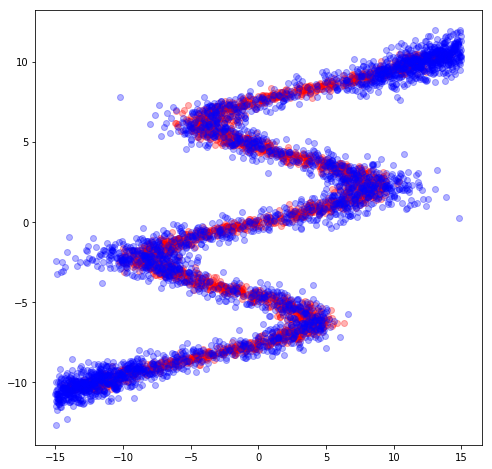

In [9]:
# Plot the samples
plt.figure(figsize=(8, 8))
plt.plot(x_data,y_data,'ro', x_test, y_samples[:,:,0], 'bo',alpha=0.3)
plt.show()
# These look pretty good!

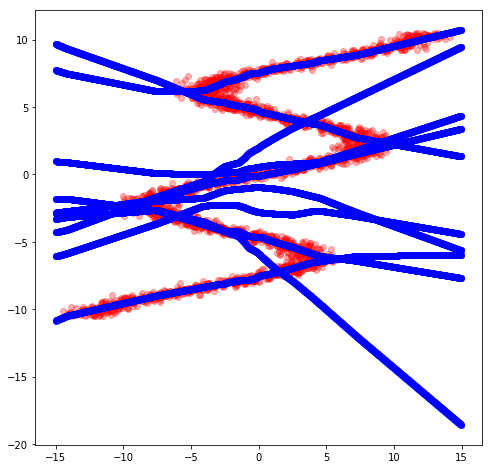

In [10]:
# Plot the means - this gives us some insight into how the model learns to produce the mixtures.
plt.figure(figsize=(8, 8))
plt.plot(x_data,y_data,'ro', x_test, mus,'bo',alpha=0.3)
plt.show()
# Cool!

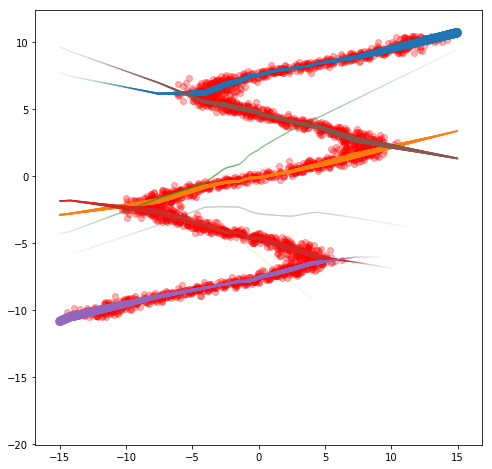

In [11]:
# Let's plot the variances and weightings of the means as well.
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)
# ax1.scatter(data[0], data[1], marker='o', c='b', s=data[2], label='the data')
ax1.scatter(x_data,y_data,marker='o', c='r', alpha=0.3)
for i in range(N_MIXES):
    ax1.scatter(x_test, mus[:,i], marker='o', s=200*sigs[:,i]*pis[:,i],alpha=0.3)
plt.show()